# <p style="text-align:center"> <span style="color:blue">[WMCS011-05] Pattern Recognition (for CS) 2022-2023 </span></p>

## <p style="text-align:center"> 1st practical: Iris recognition \& Image matching using SIFT</p>

# <p style="text-align:center"> <span style="color:blue">[WMCS011-05] Pattern Recognition (for CS) 2022-2023 </span></p>

## <p style="text-align:center"> 1st practical: Iris recognition \& Image matching using SIFT</p>

### $$ \text{Group 21} $$
### $$ \text{Chris Hadjicristodoulou}  \quad \& \quad \text{Herman Lassche}  $$

## **Information and instructions**
*   <span style="color:red">**DEADLINE**</span>  Tuesday 6 December 2022 **before** 23:59PM. Hand in this file *containing your code and answers added* through Brightspace.
*   This is a group assignment (should be done in pairs). 
*  Insert a Markdown cell (where needed) and add the formulas you used to answer a question, as well as a short description of how you came up with your solution.
*   Some exercises ask you to find a specific value or expression or ask you for an interpretation. Insert a Markdown cell and provide your answers briefly.
* Make sure to include all the necessary print statements and remove the extra ones that were only used for testing your implementation. 
*   Please ensure that all your figures are properly labeled with title, axis labels, and legend if you plot multiple curves in one graph.
*   Structure your code using comments and separate code cells where necessary, and be sure to indicate which part of your code belongs to which question.
*   To test your code, we will run all your code cells from scratch - so make sure all results can be reproduced!
* For any questions, you can contact us at [pr2022rug@gmail.com](pr2022rug@gmail.com).

## Table of Contents
* [Exercise 1 - Person authentication by binary iris pattern (50pt)](#chapter1)
    * [Part 1 - Distribution of authentics and imposters](#section_1_1)
    * [Part 2 - Person authentication](#section_1_2)
* [Exercise 2 - Image matching using SIFT (50 pt)](#chapter2)
* [Contributions](#chapter3)

In [1]:
# Import libraries
import scipy.io
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# <span style="color:blue">Exercise 1 - Person authentication by binary iris pattern (50pt)  <a class="anchor" id="chapter1"></a></span>


On Brightspace, you will find the file **lab1-data_Irisrecognition.zip**, which contains the iris codes of different persons. The file named $\textit{person01.mat}$ to $ \textit{person20.mat}$ contains a two-dimensional binary array of 20 rows, in which each row is a 30-dimensional binary iris code extracted from an iris image of a person. If you take a closer look at the rows of one such array, you will notice that two rows can differ in only a few positions (bits); If you compare two rows that come from two different files $person[i]$ and $ person[j]$, you will notice that two such iris codes differ in about 15 positions.

## Part 1 - Distribution of authentics and imposters (20pt) <a class="anchor" id="section_1_1"></a></span>


Compute two sets S and D of 10000 normalized Hamming Distance (HD) as follows:

<ol>
<li> <b> For set S: </b> Choose randomly one person and randomly two iris codes (rows) from that person. Compute the normalized HD of the iris codes from these two rows. Repeat this process 10000 times to obtain 10000 such normalized HD values. </li>
<br>

<li> <b>For set D: </b> Choose randomly two different persons and randomly one row from each of these two persons. Compute the normalized HD of these two iris codes from these two different persons. Repeat this process 10000 times to obtain 10000 such normalized HD values. </li>

</ol>

<span style="color:blue"> **(10 pt) (A)** </span> **Plot the histograms of Set S and D in one figure with different colors. Make sure to use bins of the same size for the two histograms and to use an appropriate number of bins.**

<hr>

In [2]:
# Compute Set S...
def twoDigits(a):
    return str(a) if a > 9 else str('0' + str(a)) 

def normalizedHD(a,b):
    return (np.sum(np.bitwise_xor(a,b)))/len(a)

setS = []
N = 10000

for _ in range(N):
    mat = np.array(scipy.io.loadmat('data/person' + twoDigits(random.randint(1,20)) + '.mat')['iriscode'])
    setS.append(normalizedHD(mat[random.randint(0,19)], mat[random.randint(0,19)])) #Assumed that the codes may be the same

FileNotFoundError: [Errno 2] No such file or directory: 'data/person09.mat'

In [ ]:
# Compute set D...
setD = []

for _ in range(N):
    persons = random.sample(range(1,20),2)
    mat_0 = np.array(scipy.io.loadmat('data/person' + twoDigits(persons[0]) + '.mat')['iriscode'])
    mat_1 = np.array(scipy.io.loadmat('data/person' + twoDigits(persons[1]) + '.mat')['iriscode'])
    setD.append(normalizedHD(mat_0[random.randint(0,19)], mat_1[random.randint(0,19)]))

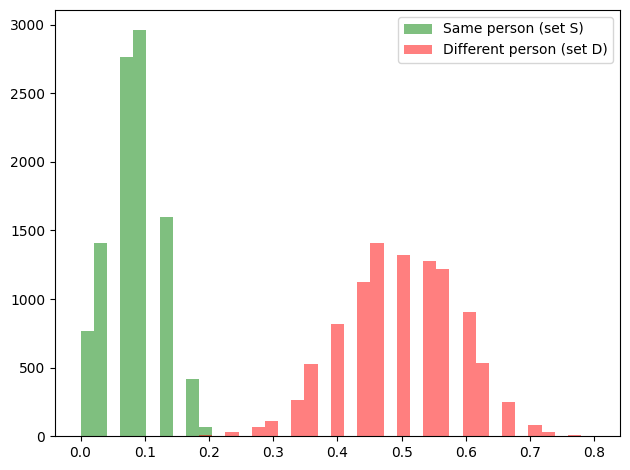

In [ ]:
# Plot histograms of Set S and D...
n_bins = 40
bins = np.linspace(0,0.8,n_bins) #Makes a clear image of the most important parts, creates nice clustered bars: not to small, but the difference is still clearly visible
plt.hist(setS, bins, alpha=0.5, color='g', label='Same person (set S)')
plt.hist(setD, bins, alpha=0.5, color='r', label='Different person (set D)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

<span style="color:blue">  **(5 pt) (B)** </span> **Compute the mean and the variance of the set S and D and specify their values.**

<hr>

In [ ]:
# Compute mean and variance...
setS_mean = np.mean(setS)
setS_var = np.var(setS)

setD_mean = np.mean(setD)
setD_var = np.var(setD)

<span style="color:blue">  **(5 pt) (C)** </span> **Draw the normal distributions (Gaussian functions), that correspond to the means and variances calculated above, to the histograms of Set S and D. Find an appropriate way to scale the normal distribution curves so that they fit well the histograms.**

<hr>

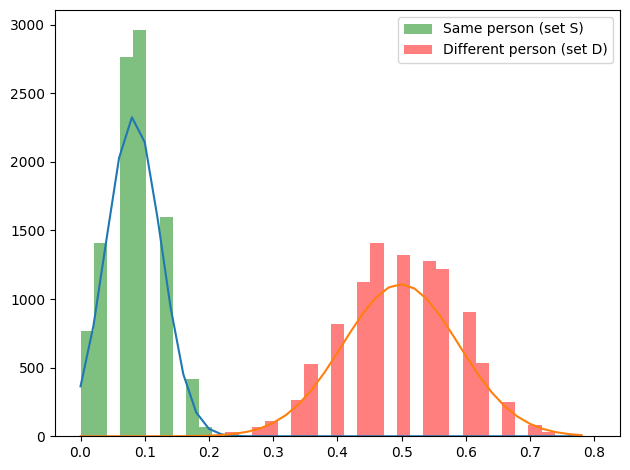

In [ ]:
# Plot the distributions...
plt.hist(setS, bins, alpha=0.5, color='g', label='Same person (set S)')
plt.hist(setD, bins, alpha=0.5, color='r', label='Different person (set D)')
plt.legend(loc='upper right')
plt.tight_layout()

scale = N/n_bins #The number of samples N and the number of bins are considered. Those give a good scalar. Since if N is lower, the bars are lower. If the number of bins are smaller, the bars are larger. The gaussian distribution scales the normalized version of the samples.     
x = np.arange(start=0, stop=0.8, step=0.02)
setS_y = scale*(1/math.sqrt(2*math.pi*setS_var))*np.exp(-(np.power(x-setS_mean,2))/(2*setS_var)) #The formula introduced in the lecutre, multiplied by the scalar
setD_y = scale*(1/math.sqrt(2*math.pi*setD_var))*np.exp(-(np.power(x-setD_mean,2))/(2*setD_var)) 
plt.plot(x, setS_y)
plt.plot(x, setD_y)
plt.show()

## Part 2 - Person authentication (30pt) <a class="anchor" id="section_1_2"></a></span>


The distribution associated with the set S is the class-conditional probability density function that we measure a given HD value for two iris codes of the same person. The distribution associated with the set D is the class-conditional probability density function that we measure a given HD value for two iris codes of two different persons.

Our Null-hypothesis $\textit{H0}$ is that two iris patterns are different. We choose a value
for the decision criterion $\textit{d}$ and compare the HD of two iris patterns to d. If $ \textit{HD > d}$, we consider this as confirmation of our assumption that the two iris codes are different; If $\textit{HD < d}$, we consider our assumption that the two iris codes are different is not confirmed, i.e., implicitly we accept that they come from the same person.

<span style="color:blue">  **(5 pt) (A)** </span> **Estimate the value of the decision criterion d for which the probability of accepting an imposter is 0.0005. This situation will occur when the HD between the iris codes of two different persons is smaller than the decision criterion d. You can use the python function $scipy.stats.norm.ppf$ to find such decision criterion.**

<hr>

In [ ]:
# Estimate the decision criterion d...
d = scipy.stats.norm.ppf(0.0005, setD_mean, math.sqrt(setD_var)) #Gives reasonable outcomes, when looking at the plots (around 0.2). Right there is a split in the distributions.
print('Estimation of decision criterion d: ' + str(d))

Estimation of decision criterion d: 0.20237254338407185


<span style="color:blue">  **(5 pt) (B)** </span> **For the value of the decision criterion calculated above, determine the probability of rejecting an authentic person. For this purpose, use a normal distribution to model Set S and find the value of the integral in the tail of this distribution for values HD > d. You can use the python function $scipy.stats.norm.cdf$ to compute such a probability.**

<hr>

In [ ]:
# Determine the probability of...
prob = 1 - scipy.stats.norm.cdf(d, setS_mean, math.sqrt(setS_var))
print('Probability of rejecting an authentic person: ' + str(prob))

Probability of rejecting an authentic person: 0.0025605779890762737


<span style="color:blue">  **(15 pt) (C)** </span> **Consider the iris code given in the file $\textit{testperson.mat}$. This file contains an iris code with some missing bits. These missing bits have the value 2 instead of 0 or 1. To which of the 20 persons whose iris codes are stored in files $person01.mat$ to $person20.mat$ does this iris code most likely belong to?**

<hr>

In [ ]:
def createMask(b):
     a = np.array(b, copy=True)
     a[a == 1] = 1
     a[a == 0] = 1
     a[a == 2] = 0
     return a

def normalizedHDmissing(a,b,maskA, maskB):
     return (np.sum(np.bitwise_and(np.bitwise_and(np.bitwise_xor(a,b), maskA), maskB)))/np.sum(np.bitwise_and(maskA,maskB))
     #Using the formula introduced in the lecture

test = np.array(scipy.io.loadmat('data/testperson.mat')['iriscode'])
masktest = createMask(test) #Create mask
HD_test = []
HD_test_crit = []
for i in range(20): #Calculate hamming distance of all scans of all persons with the test person
    mat = np.array(scipy.io.loadmat('data/person' + twoDigits(i+1) + '.mat')['iriscode'])
    temp = []
    for j in range(20):
          temp.append(normalizedHDmissing(mat[j],test,[1]*30,masktest)) #Data of other scans are all good so: [1....1]
    HD_test.append(np.mean(temp))
    if HD_test[i] < d:
          HD_test_crit.append(i) 

best = np.argmin(HD_test)
print('The lowest HD belongs to person ' + str(twoDigits(best+1)) + '. Therefore it is most probably a scan of this person, with criterium: ' 
     + str(HD_test[best]) + '. It also is the only scan that is lower than the decision criterium (Number of HD lower than d: ' + str(len(HD_test_crit)) + ').' )



The lowest HD belongs to person 05. Therefore it is most probably a scan of this person, with criterium: 0.027500000000000004. It also is the only scan that is lower than the decision criterium( Number of HD lower than d: 1).


<span style="color:blue"> **(5 pt) (D)** </span> **What is the significance level of your decision? $Hint:$ Excluding the bits with a value of 2, denote by HDt the normalized Hamming distance between the iris code of the test person and the iris code of the person that you identified in the data set. The significance level which corresponds to HDt is defined as the probability that the comparison of the iris code of the test person with the iris code of a different person will result in a HD such that HD ≤ HDt, i.e., the concerned significance level is equal to the integral of the tail of the distribution for HD ≤ HDt. To compute its value, make use of the theoretical expression for the parameters of the normal distribution of the normalized iris code HD for the given number of available (i.e., non-missing) bits.**


<hr>

In [ ]:
delBits = np.where(test == 2)
test = np.delete(test, delBits[1], 1)
idP = np.array(scipy.io.loadmat('data/person' + twoDigits(best+1) + '.mat')['iriscode'])
idP_mean = []

for i in range(20):
    a = idP[i]
    a = np.delete(a, delBits[1], 0)
    idP_mean.append(normalizedHD(a, test))
HDt = np.mean(idP_mean)

setHD = []
for i in range(20): #Calculate normalized hamming distance of all scans (excluding missing bits) of all persons with the test person
    if i == best:
        continue
    mat = np.array(scipy.io.loadmat('data/person' + twoDigits(i+1) + '.mat')['iriscode'])
    for j in range(20):
            a = mat[j]
            a = np.delete(a, delBits[1], 0)
            setHD.append(normalizedHD(a, test))

prob = scipy.stats.norm.cdf(HDt, np.mean(setHD), math.sqrt(np.var(setHD)))
print('Probability of accepting another person: ' + str(prob))
    




Probability of accepting another person: 0.00011184919599257469


<hr>

# <span style="color:blue">Exercise 2 - Image matching using SIFT (50pt)  <a class="anchor" id="chapter2"></a></span>

You are given two images named $a.jpg$ and $b.jpg$ that contain the same scene taken from different views. Use SIFT algorithm to identify key points in both the images and perform image matching based on the obtained descriptors.

<span style="color:blue"> **(10 pt) (A)** </span> **Describe briefly how the SIFT and SURF algorithms work.**

<hr>

<span style="color:blue"> **(10 pt) (B)** </span>  **Display the two images and the corresponding key points identified by SIFT detector. You can use the built-in functions from $opencv$ to get and display the key points.**

<hr>

<span style="color:blue"> **(30 pt) (C)** </span> **Match the obtained descriptors in the two images and display the results that draw lines between the matched descriptors from the two images. You can use the built-in functions from $opencv$ to get and display the results for image matching.**

<hr>

# <span style="color:blue">Contributions<a class="anchor" id="chapter3"></a></span>

We divided the work based on the excersises. 
Chris did excersise 2 and Herman did excersise 1. 
Further, we helped each other out when struggles were faced.




### $$ \text{Group X} $$
### $$ \text{Student 1}  \quad \& \quad \text{Student 2}  $$

## **Information and instructions**
*   <span style="color:red">**DEADLINE**</span>  Tuesday 6 December 2022 **before** 23:59PM. Hand in this file *containing your code and answers added* through Brightspace.
*   This is a group assignment (should be done in pairs). 
*  Insert a Markdown cell (where needed) and add the formulas you used to answer a question, as well as a short description of how you came up with your solution.
*   Some exercises ask you to find a specific value or expression or ask you for an interpretation. Insert a Markdown cell and provide your answers briefly.
* Make sure to include all the necessary print statements and remove the extra ones that were only used for testing your implementation. 
*   Please ensure that all your figures are properly labeled with title, axis labels, and legend if you plot multiple curves in one graph.
*   Structure your code using comments and separate code cells where necessary, and be sure to indicate which part of your code belongs to which question.
*   To test your code, we will run all your code cells from scratch - so make sure all results can be reproduced!
* For any questions, you can contact us at [pr2022rug@gmail.com](pr2022rug@gmail.com).

## Table of Contents
* [Exercise 1 - Person authentication by binary iris pattern (50pt)](#chapter1)
    * [Part 1 - Distribution of authentics and imposters](#section_1_1)
    * [Part 2 - Person authentication](#section_1_2)
* [Exercise 2 - Image matching using SIFT (50 pt)](#chapter2)
* [Contributions](#chapter3)

In [ ]:
# Import libraries



# <span style="color:blue">Exercise 1 - Person authentication by binary iris pattern (50pt)  <a class="anchor" id="chapter1"></a></span>


On Brightspace, you will find the file **lab1-data_Irisrecognition.zip**, which contains the iris codes of different persons. The file named $\textit{person01.mat}$ to $ \textit{person20.mat}$ contains a two-dimensional binary array of 20 rows, in which each row is a 30-dimensional binary iris code extracted from an iris image of a person. If you take a closer look at the rows of one such array, you will notice that two rows can differ in only a few positions (bits); If you compare two rows that come from two different files $person[i]$ and $ person[j]$, you will notice that two such iris codes differ in about 15 positions.

## Part 1 - Distribution of authentics and imposters (20pt) <a class="anchor" id="section_1_1"></a></span>


Compute two sets S and D of 10000 normalized Hamming Distance (HD) as follows:

<ol>
<li> <b> For set S: </b> Choose randomly one person and randomly two iris codes (rows) from that person. Compute the normalized HD of the iris codes from these two rows. Repeat this process 10000 times to obtain 10000 such normalized HD values. </li>
<br>

<li> <b>For set D: </b> Choose randomly two different persons and randomly one row from each of these two persons. Compute the normalized HD of these two iris codes from these two different persons. Repeat this process 10000 times to obtain 10000 such normalized HD values. </li>

</ol>

<span style="color:blue"> **(10 pt) (A)** </span> **Plot the histograms of Set S and D in one figure with different colors. Make sure to use bins of the same size for the two histograms and to use an appropriate number of bins.**

<hr>

In [ ]:
# Compute Set S...



In [ ]:
# Compute set D...



In [ ]:
# Plot histograms of Set S and D...



<span style="color:blue">  **(5 pt) (B)** </span> **Compute the mean and the variance of the set S and D and specify their values.**

<hr>

In [ ]:
# Compute mean and variance...



<span style="color:blue">  **(5 pt) (C)** </span> **Draw the normal distributions (Gaussian functions), that correspond to the means and variances calculated above, to the histograms of Set S and D. Find an appropriate way to scale the normal distribution curves so that they fit well the histograms.**

<hr>

In [ ]:
# Plot the distributions...



## Part 2 - Person authentication (30pt) <a class="anchor" id="section_1_2"></a></span>


The distribution associated with the set S is the class-conditional probability density function that we measure a given HD value for two iris codes of the same person. The distribution associated with the set D is the class-conditional probability density function that we measure a given HD value for two iris codes of two different persons.

Our Null-hypothesis $\textit{H0}$ is that two iris patterns are different. We choose a value
for the decision criterion $\textit{d}$ and compare the HD of two iris patterns to d. If $ \textit{HD > d}$, we consider this as confirmation of our assumption that the two iris codes are different; If $\textit{HD < d}$, we consider our assumption that the two iris codes are different is not confirmed, i.e., implicitly we accept that they come from the same person.

<span style="color:blue">  **(5 pt) (A)** </span> **Estimate the value of the decision criterion d for which the probability of accepting an imposter is 0.0005. This situation will occur when the HD between the iris codes of two different persons is smaller than the decision criterion d. You can use the python function $scipy.stats.norm.ppf$ to find such decision criterion.**

<hr>

In [ ]:
# Estimate the decision criterion d...



<span style="color:blue">  **(5 pt) (B)** </span> **For the value of the decision criterion calculated above, determine the probability of rejecting an authentic person. For this purpose, use a normal distribution to model Set S and find the value of the integral in the tail of this distribution for values HD > d. You can use the python function $scipy.stats.norm.cdf$ to compute such a probability.**

<hr>

In [ ]:
# Determine the probability of...



<span style="color:blue">  **(15 pt) (C)** </span> **Consider the iris code given in the file $\textit{testperson.mat}$. This file contains an iris code with some missing bits. These missing bits have the value 2 instead of 0 or 1. To which of the 20 persons whose iris codes are stored in files $person01.mat$ to $person20.mat$ does this iris code most likely belong to?**

<hr>

<span style="color:blue"> **(5 pt) (D)** </span> **What is the significance level of your decision? $Hint:$ Excluding the bits with a value of 2, denote by HDt the normalized Hamming distance between the iris code of the test person and the iris code of the person that you identified in the data set. The significance level which corresponds to HDt is defined as the probability that the comparison of the iris code of the test person with the iris code of a different person will result in a HD such that HD ≤ HDt, i.e., the concerned significance level is equal to the integral of the tail of the distribution for HD ≤ HDt. To compute its value, make use of the theoretical expression for the parameters of the normal distribution of the normalized iris code HD for the given number of available (i.e., non-missing) bits.**


<hr>

<hr>

# <span style="color:blue">Exercise 2 - Image matching using SIFT (50pt)  <a class="anchor" id="chapter2"></a></span>

You are given two images named $a.jpg$ and $b.jpg$ that contain the same scene taken from different views. Use SIFT algorithm to identify key points in both the images and perform image matching based on the obtained descriptors.

<span style="color:blue"> **(10 pt) (A)** </span> **Describe briefly how the SIFT and SURF algorithms work.**

<hr>

<span style="color:blue"> **(10 pt) (B)** </span>  **Display the two images and the corresponding key points identified by SIFT detector. You can use the built-in functions from $opencv$ to get and display the key points.**

<hr>

<span style="color:blue"> **(30 pt) (C)** </span> **Match the obtained descriptors in the two images and display the results that draw lines between the matched descriptors from the two images. You can use the built-in functions from $opencv$ to get and display the results for image matching.**

<hr>

# <span style="color:blue">Contributions<a class="anchor" id="chapter3"></a></span>